In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Conv1D, MaxPooling1D, Dropout, Flatten, Dense


# Load prepared data

In [6]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/"

## fmap mean all experiments

In [7]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [8]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


## 55 fmap means

In [5]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        name = str(arr[i])+'_'+str(j+1)+'m'+str(j)
        col.append(name)

In [6]:
file_name = save_path+"fmap_mean_55.txt"
columns = ['exp', 'mini_exp', 'i', 'j', 'k']
for i in range(len(col)): 
    columns.append(col[i])
columns.append('theory')
data = np.loadtxt(file_name);

In [7]:
df_55 = pd.DataFrame(data, columns=columns)
df_55 = df_55.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df_55

,exp,mini_exp,i,j,k,4_2m1,4_3m2,4_4m3,4_5m4,4_6m5,...,12_4m3,12_5m4,12_6m5,12_7m6,12_8m7,12_9m8,12_10m9,12_11m10,12_12m11,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_55.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 61 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   4_2m1     float64
 6   4_3m2     float64
 7   4_4m3     float64
 8   4_5m4     float64
 9   4_6m5     float64
 10  4_7m6     float64
 11  4_8m7     float64
 12  4_9m8     float64
 13  4_10m9    float64
 14  4_11m10   float64
 15  4_12m11   float64
 16  6_2m1     float64
 17  6_3m2     float64
 18  6_4m3     float64
 19  6_5m4     float64
 20  6_6m5     float64
 21  6_7m6     float64
 22  6_8m7     float64
 23  6_9m8     float64
 24  6_10m9    float64
 25  6_11m10   float64
 26  6_12m11   float64
 27  8_2m1     float64
 28  8_3m2     float64
 29  8_4m3     float64
 30  8_5m4     float64
 31  8_6m5     float64
 32  8_7m6     float64
 33  8_8m7     float64
 34  8_9m8     float64
 35  8_10m9    float64
 36  8_11m10 

## Only +ON and -ON

In [18]:
file_name = save_path+"fmap_on.txt"
columns =['exp', 'mini_exp', 'run', 'i', 'j', 'k', 'off', 'on', 'theory']
data = np.loadtxt(file_name);

In [19]:
df_on = pd.DataFrame(data, columns=columns)
df_on = df_on.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, "run":int})
df_on

,exp,mini_exp,run,i,j,k,off,on,theory
0,36,1,1,0,0,0,0.0,0.0,0.0
1,36,1,1,0,0,1,0.0,0.0,0.0
2,36,1,1,0,0,2,0.0,0.0,0.0
3,36,1,1,0,0,3,0.0,0.0,0.0
4,36,1,1,0,0,4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6488059,38,6,-1,43,63,59,0.0,0.0,0.0
6488060,38,6,-1,43,63,60,0.0,0.0,0.0
6488061,38,6,-1,43,63,61,0.0,0.0,0.0
6488062,38,6,-1,43,63,62,0.0,0.0,0.0


In [20]:
df_on.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6488064 entries, 0 to 6488063
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   run       int64  
 3   i         int64  
 4   j         int64  
 5   k         int64  
 6   off       float64
 7   on        float64
 8   theory    float64
dtypes: float64(3), int64(6)
memory usage: 445.5 MB


# Split data

## Data 1. fmap mean all experiments

In [9]:
X = df.iloc[:, 5:-1].values  
y = df['theory'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [10]:
print(X.shape)
print(y.shape)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(3244032, 5)
(3244032,)
(2270822, 5)
(2270822,)
(973210, 5)
(973210,)


## Data2: One experiment

In [11]:
df_train = df[(df['exp']==38) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==38) & (df['mini_exp']==6)]

In [12]:
df_train.iloc[:, 5:-1]

,mean0,mean1,mean2,mean3,mean4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
901115,0.0,0.0,0.0,0.0,0.0
901116,0.0,0.0,0.0,0.0,0.0
901117,0.0,0.0,0.0,0.0,0.0
901118,0.0,0.0,0.0,0.0,0.0


In [12]:
X2_train = df_train.iloc[:, 5:-1].values
y2_train = df_train['theory'].values

X2_test = df_test.iloc[:, 5:-1].values
y2_test = df_test['theory'].values

In [13]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


## Data3: 55 fmap means

In [15]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        name = str(arr[i])+'_'+str(j+1)+'m'+str(j)
        col.append(name)

In [16]:
X = df_55.iloc[:, 5:-1].values 
y = df_55['theory'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [17]:
print(X.shape)
print(y.shape)
print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)

(3244032, 55)
(3244032,)
(2270822, 55)
(2270822,)
(973210, 55)
(973210,)


## Data4: Only +ON and -ON

In [29]:
X = df_on.iloc[:, 2:-1].values  # include i,j,k
y = df_on['theory'].values

X4_train, X4_test, y4_train, y4_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [30]:
print(X.shape)
print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)

(6488064, 6)
(6488064,)
(4541644, 6)
(4541644,)
(1946420, 6)
(1946420,)


# Convolutional Neural Network

In [16]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')]

## Data1: 5 fmap means

In [18]:
# Reshape the data
X_train = X1_train.reshape(X1_train.shape[0], X1_train.shape[1], 1)
X_test = X1_test.reshape(X1_test.shape[0], X1_test.shape[1], 1)
y_train = y1_train
y_test = y1_test

In [20]:
model = keras.Sequential()

model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks =myCallbacks)

Epoch 1/100


2022-11-02 23:38:31.418867: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


70964/70964 [==============================] - 111s 2ms/step - loss: 45.2450 - accuracy: 0.5718 - val_loss: 37.2040 - val_accuracy: 0.8086
Epoch 2/100
70964/70964 [==============================] - 110s 2ms/step - loss: 29.1057 - accuracy: 0.8080 - val_loss: 35.5464 - val_accuracy: 0.8086
Epoch 3/100
70964/70964 [==============================] - 111s 2ms/step - loss: 28.5122 - accuracy: 0.8079 - val_loss: 35.5726 - val_accuracy: 0.8086
Epoch 4/100
70964/70964 [==============================] - 113s 2ms/step - loss: 29.0364 - accuracy: 0.8079 - val_loss: 37.7380 - val_accuracy: 0.8086
Epoch 5/100
70964/70964 [==============================] - 112s 2ms/step - loss: 28.7926 - accuracy: 0.8080 - val_loss: 36.0597 - val_accuracy: 0.8084
Epoch 6/100
70964/70964 [==============================] - 116s 2ms/step - loss: 28.4507 - accuracy: 0.8080 - val_loss: 35.4655 - val_accuracy: 0.8086
Epoch 7/100
70964/70964 [==============================] - 110s 2ms/step - loss: 28.4339 - accuracy: 0.808

In [21]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

70964/70964 [==============================] - 61s 851us/step
27.556791717662296
0.8979301616815573
30413/30413 [==============================] - 23s 742us/step
35.2594088023826
0.9416811054773528


In [22]:
np.corrcoef(test_pred.flatten(),y_test)

array([[1.        , 0.73591372],
       [0.73591372, 1.        ]])

In [23]:
model.evaluate(X_test, y_test)

30413/30413 [==============================] - 26s 854us/step - loss: 35.2594 - accuracy: 0.8084


[35.25939178466797, 0.808391809463501]

In [24]:
r2_score(y_test, test_pred)

0.5409404558795838

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 32)             96        
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,397
Trainable params: 1,397
Non-trainable params: 0
_________________________________________________________________


In [26]:
history.history

{'loss': [45.24497604370117,
  29.105682373046875,
  28.51218605041504,
  29.036428451538086,
  28.79255485534668,
  28.450664520263672,
  28.43390655517578,
  28.263103485107422,
  28.02814483642578,
  27.970251083374023,
  28.182268142700195,
  28.14678955078125,
  27.921627044677734,
  28.52938461303711,
  27.908533096313477,
  28.318798065185547],
 'accuracy': [0.571804404258728,
  0.8080030083656311,
  0.8079488277435303,
  0.8079091906547546,
  0.8080078363418579,
  0.8080100417137146,
  0.8080135583877563,
  0.8077414035797119,
  0.8062419891357422,
  0.8031976819038391,
  0.7976292371749878,
  0.7929877638816833,
  0.7920787930488586,
  0.7872123122215271,
  0.7918203473091125,
  0.7920457720756531],
 'val_loss': [37.20401382446289,
  35.54644775390625,
  35.572574615478516,
  37.73800277709961,
  36.059749603271484,
  35.465545654296875,
  35.41085433959961,
  35.093849182128906,
  35.30485153198242,
  35.187469482421875,
  35.41741943359375,
  35.98316955566406,
  35.22745895

## Data2: One experiments

In [14]:
# Reshape the data
X_train = X2_train.reshape(X2_train.shape[0], X2_train.shape[1], 1)
X_test = X2_test.reshape(X2_test.shape[0], X2_test.shape[1], 1)
y_train = y2_train
y_test = y2_test

In [17]:
model = keras.Sequential()

# model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
# model.add(Flatten())
# model.add(Dense(64, activation="relu"))
# model.add(Dense(1))
# Coef 0.415, MSE 86.28, MAPE 1.15, Accuracy 0.8064

model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
# Coef 0.648 MSE 58.52, MAPE 0.91, Accuracy 0.8064 => Best
    
    
# model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.1))
# model.add(Dense(10, activation="relu"))
# model.add(Dense(5, activation="relu"))
# model.add(Dense(1))
# # Coef 0.5099, MSE 74.244, MAPE 0.9068, Accuracy 0.8064

# model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.1))
# model.add(Dense(10, activation="relu"))
# model.add(Dense(1))
# # Coef 0.5049, MSE 71.10 MAPE 1.047, Accuracy 0.8064

# model.add(Conv1D(32, 2, activation ="relu", input_shape=(len(X_train[0]), 1)))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(64, 2, activation ="relu"))
# model.add(MaxPooling1D(1))
# model.add(Flatten())
# model.add(Dense(64, activation ="relu"))
# model.add(Dense(20, activation="relu"))
# model.add(Dense(1))
# # Coef 0.5585, MSE 70.26, MAPE 0.8898, Accuracy 0.8065


# model.add(Conv1D(64, 8, padding='same', input_shape=(len(X_train[0]), 1), activation='relu'))
# model.add(MaxPooling1D(2, padding='same'))
# model.add(Conv1D(64, 8, padding='same', activation='relu'))
# model.add(MaxPooling1D(2, padding='same'))
# model.add(Conv1D(32, 8, padding='same', activation='relu'))
# model.add(Conv1D(1, 8, padding='same', activation='tanh'))
# Accuracy 5.5487e-06


model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks =[myCallbacks])


Epoch 1/100
28160/28160 [==============================] - 42s 1ms/step - loss: 73.1312 - accuracy: 0.8061 - val_loss: 57.0813 - val_accuracy: 0.8064
Epoch 2/100
28160/28160 [==============================] - 39s 1ms/step - loss: 59.1848 - accuracy: 0.8059 - val_loss: 57.4163 - val_accuracy: 0.8064
Epoch 3/100
28160/28160 [==============================] - 39s 1ms/step - loss: 59.9239 - accuracy: 0.8024 - val_loss: 60.9042 - val_accuracy: 0.8064
Epoch 4/100
28160/28160 [==============================] - 38s 1ms/step - loss: 57.0014 - accuracy: 0.8040 - val_loss: 56.3113 - val_accuracy: 0.8064
Epoch 5/100
28160/28160 [==============================] - 41s 1ms/step - loss: 67.5630 - accuracy: 0.8017 - val_loss: 84.1407 - val_accuracy: 0.8064
Epoch 6/100
28160/28160 [==============================] - 39s 1ms/step - loss: 67.2155 - accuracy: 0.7937 - val_loss: 60.4075 - val_accuracy: 0.8064
Epoch 7/100
28160/28160 [==============================] - 40s 1ms/step - loss: 73.8235 - accuracy: 

In [18]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

28160/28160 [==============================] - 32s 1ms/step
70.86180598595585
0.919218657009411
5632/5632 [==============================] - 8s 1ms/step
71.25752545429637
0.9278995052330536


In [19]:
np.corrcoef(test_pred.flatten(),y_test)

array([[1.        , 0.54615447],
       [0.54615447, 1.        ]])

In [20]:
model.evaluate(X_test, y_test)

5632/5632 [==============================] - 8s 1ms/step - loss: 71.2560 - accuracy: 0.8065


[71.25595092773438, 0.8065462708473206]

In [21]:
r2_score(y_test, test_pred)

0.2880962472676275

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 32)             96        
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,397
Trainable params: 1,397
Non-trainable params: 0
_________________________________________________________________


In [23]:
history.history

{'loss': [73.1312255859375,
  59.184783935546875,
  59.92388153076172,
  57.00144577026367,
  67.5629653930664,
  67.21548461914062,
  73.82347106933594,
  66.02452850341797,
  63.15570068359375,
  63.288665771484375,
  62.78019332885742,
  62.44813919067383,
  64.25733184814453,
  68.87013244628906],
 'accuracy': [0.8060979843139648,
  0.8058604598045349,
  0.8024269938468933,
  0.8039628267288208,
  0.8017134070396423,
  0.7937233448028564,
  0.7923117876052856,
  0.7805009484291077,
  0.7624500393867493,
  0.7716841101646423,
  0.7892112135887146,
  0.7791104316711426,
  0.7775823473930359,
  0.7851718068122864],
 'val_loss': [57.081302642822266,
  57.416297912597656,
  60.9041748046875,
  56.3112907409668,
  84.14068603515625,
  60.407508850097656,
  57.60114669799805,
  77.38729858398438,
  57.46821212768555,
  60.90582275390625,
  57.8039665222168,
  57.15788650512695,
  76.3587417602539,
  71.25595092773438],
 'val_accuracy': [0.8063909411430359,
  0.8063909411430359,
  0.806390

## Plot

### Loss function (MSE)

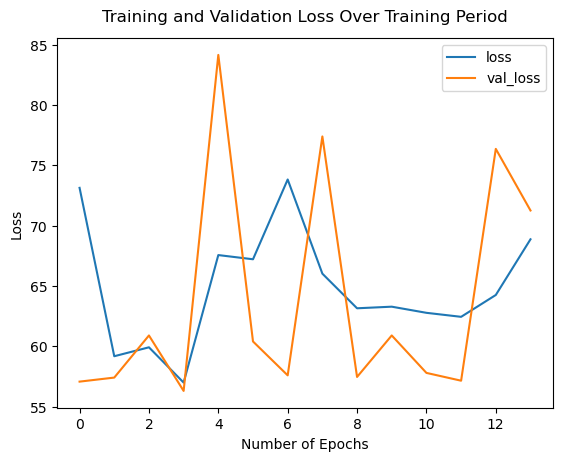

In [24]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

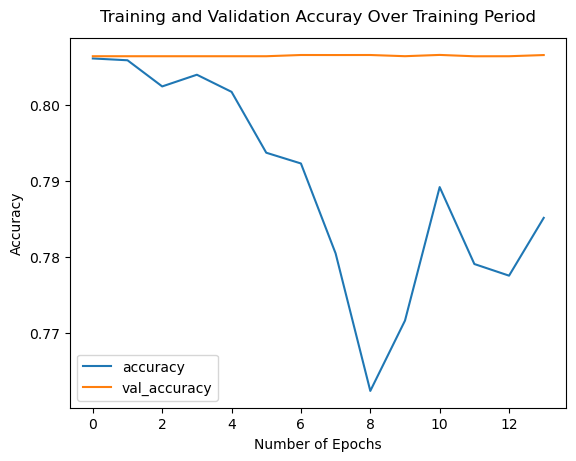

In [25]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.54615%, st_er: 0.000882%
y = 0.244*x + 1.4153


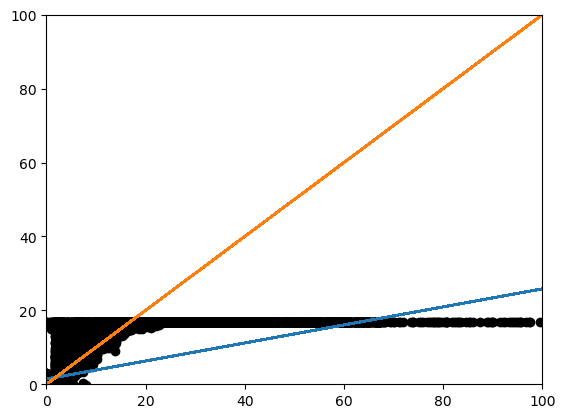

In [26]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output image data

In [115]:
df_test['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_72933/4195812830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred


In [120]:
np.savetxt(save_path+"cnn.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

## Data3: 55 fmap

In [35]:
# Reshape the data
X_train = X3_train.reshape(X3_train.shape[0], X3_train.shape[1], 1)
X_test = X3_test.reshape(X3_test.shape[0], X3_test.shape[1], 1)
y_train = y3_train
y_test = y3_test

In [36]:
model = keras.Sequential()

model.add(Conv1D(32, 2, activation="relu", input_shape=(len(X_train[0]), 1)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks =[myCallbacks])


Epoch 1/100
70964/70964 [==============================] - 148s 2ms/step - loss: 69.6852 - accuracy: 0.0081 - val_loss: 76.8094 - val_accuracy: 4.1101e-06
Epoch 2/100
70964/70964 [==============================] - 162s 2ms/step - loss: 69.5679 - accuracy: 6.1652e-06 - val_loss: 76.8083 - val_accuracy: 4.1101e-06
Epoch 3/100
70964/70964 [==============================] - 171s 2ms/step - loss: 69.5674 - accuracy: 6.1652e-06 - val_loss: 76.8085 - val_accuracy: 4.1101e-06
Epoch 4/100
70964/70964 [==============================] - 172s 2ms/step - loss: 69.5673 - accuracy: 6.1652e-06 - val_loss: 76.8081 - val_accuracy: 4.1101e-06
Epoch 5/100
70964/70964 [==============================] - 178s 3ms/step - loss: 69.5674 - accuracy: 6.1652e-06 - val_loss: 76.8099 - val_accuracy: 4.1101e-06
Epoch 6/100
70964/70964 [==============================] - 187s 3ms/step - loss: 69.5676 - accuracy: 6.1652e-06 - val_loss: 76.8083 - val_accuracy: 4.1101e-06
Epoch 7/100
70964/70964 [=========================

In [37]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

70964/70964 [==============================] - 81s 1ms/step
69.56748562282851
1.6219548325735367
30413/30413 [==============================] - 34s 1ms/step
76.80925536823676
1.62501204828848


In [38]:
np.corrcoef(test_pred.flatten(),y_test)

/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])

In [39]:
model.evaluate(X_test, y_test)

30413/30413 [==============================] - 38s 1ms/step - loss: 76.8097 - accuracy: 4.1101e-06


[76.80967712402344, 4.110109784960514e-06]

In [40]:
r2_score(y_test, test_pred)

-1.738404612039446e-05

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 54, 32)            96        
                                                                 
 flatten_2 (Flatten)         (None, 1728)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                17290     
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17,397
Trainable params: 17,397
Non-trainable params: 0
_________________________________________________________________


In [42]:
history.history

{'loss': [69.68523406982422,
  69.56790161132812,
  69.5673599243164,
  69.56727600097656,
  69.56737518310547,
  69.5676040649414,
  69.56756591796875,
  69.56761932373047,
  69.56724548339844,
  69.56778717041016,
  69.5670166015625],
 'accuracy': [0.008129655383527279,
  6.1651685427932534e-06,
  6.1651685427932534e-06,
  6.1651685427932534e-06,
  6.1651685427932534e-06,
  6.1651685427932534e-06,
  6.1651685427932534e-06,
  6.1651685427932534e-06,
  6.1651685427932534e-06,
  6.1651685427932534e-06,
  6.1651685427932534e-06],
 'val_loss': [76.80938720703125,
  76.808349609375,
  76.80852508544922,
  76.80806732177734,
  76.80989837646484,
  76.80828094482422,
  76.81019592285156,
  76.8091812133789,
  76.8093032836914,
  76.80817413330078,
  76.80967712402344],
 'val_accuracy': [4.110109784960514e-06,
  4.110109784960514e-06,
  4.110109784960514e-06,
  4.110109784960514e-06,
  4.110109784960514e-06,
  4.110109784960514e-06,
  4.110109784960514e-06,
  4.110109784960514e-06,
  4.110109